In [2]:
import pandas as pd
import numpy as np 
import scipy as sci
import sklearn as sks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_rows', 150)

## Function: analysis of a dataset

here are two funcitons.  One fits a linear model, and the other fits exponential.  We get exponential fits by taking the natural log of our y data when trianing, and then rais ethe results by e to the result to transofrm our predicitons back.  There was some initial exploratory code and analysis (linear predicitons) to get a sense of what features might be important, and from there the exponential fit function was created.  After this, to make results more sussinct, a loop was run to combine all stats into a dataframe

In [40]:
def linear_model_prediciton(data,data_name, seeds = [5,10,15,20,25]):
    ret_dict = {}
    ret_dict['name'] = [data_name]
    ret_dict['type'] = ['linear']
    
    ret_dict['r^2'] = []
    ret_dict['MSE'] = []
    ret_dict['resid abs % diff med'] = []
    ret_dict['resid abs % diff mean'] = []
    ret_dict['resid sd'] = []
    ret_dict['MeanAE'] = []
    ret_dict['MedAE'] = []
    ret_dict['coefs'] = []
    
    
    for seed in seeds:
        x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], 
                                                                            test_size = 0.25, random_state = seed)

        reg = LinearRegression().fit(x_train, y_train)

        y_pred = reg.predict(x_test)
        residuals = y_test - y_pred

        #plt.figure(figsize = (11,2))
        #plt.boxplot(residuals, vert = False)
        #ttl = 'residuals for linear fit on '+ data_name
        #plt.title(ttl)


        r_squared = reg.score(x_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        meanabsresid = np.mean(np.abs(residuals))
        medabsresid = np.median(np.abs(residuals))
        resid_sd = np.std(residuals)
        meanresidpercdiff = 100 * np.mean(np.abs(residuals/y_test))
        medresidpercdiff = 100 * np.median(np.abs(residuals/y_test))
        
        ret_dict['r^2'] = []
        ret_dict['MSE'] = []
        ret_dict['resid abs % diff med'] = []
        ret_dict['resid abs % diff mean'] = []
        ret_dict['resid sd'] = []
        ret_dict['MeanAE'] = []
        ret_dict['MedAE'] = []
        ret_dict['coefs'] = []
    
    print('')
    print('')
    print('linear analysis for:', data_name)
    print('')
    print('     r squared (ceof of det) is', round(r_squared,3))
    ret_dict['r^2'] = [round(np.mean(ret_dict['r^2']),3)]
    print('     mean squared error:', round(, 3))
    ret_dict['MSE'] = [round(mean_squared_error(y_test, y_pred),3)]
    print('     mean absolute error:', round(np.mean(np.abs(residuals)),3))
    ret_dict['MeanAE'] = [round(np.mean(np.abs(residuals)),3)]
    print('     median absolute error:', round(np.median(np.abs(residuals)),3))
    ret_dict['MedAE'] = [round(np.median(np.abs(residuals)),3)]
    print('     resudial standard deviation:', round(,3))
    ret_dict['resid sd'] = [round(np.std(residuals),3)]
    print('     residual absolute % difference mean:', round(100 * np.mean(np.abs(residuals/y_test)),1), '%')
    ret_dict['resid abs % diff mean'] = [round(100 * np.mean(np.abs(residuals/y_test)),1)]
    print('     residual absolute % difference median:', round(100 * np.median(np.abs(residuals/y_test)),1), '%')
    ret_dict['resid abs % diff med'] = [round(100 * np.median(np.abs(residuals/y_test)),1)]
    print('')
    print('     coeficients:')
    print('          intercept', round(reg.intercept_,3))
    ret_dict['coefs'] = [[]]
    lst_cols = list(data.columns)
    for i in range(len(data.columns)-1):
        print('          ',lst_cols[i], round(reg.coef_[i],3))
        ret_dict['coefs'][0].append((lst_cols[i], round(reg.coef_[i],3)))
        
    return ret_dict


In [41]:
def exp_model_prediciton(data,data_name):
    
    x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], 
                                                                        test_size = 0.25, random_state = 20)
    
    y_train = np.log(y_train)  # we take ln hear because we are trying to fit an exp model, so we take ln of y data
    #we need x_train, x_test, y_train_log, y_test_lin 
    
    reg = LinearRegression().fit(x_train, y_train)  # fit on log data, so we should get log data predicitons

    y_pred = reg.predict(x_test)
    y_pred = np.exp(y_pred)  # here we convert back from ln units to normal units, so we have the same scale
    residuals = y_test - y_pred
    
    plt.figure(figsize = (11,2))
    plt.boxplot(residuals, vert = False)
    ttl = 'residuals for exponential fit on '+ data_name
    plt.title(ttl)
    
    ret_dict = {}
    ret_dict['name'] = [data_name]
    ret_dict['type'] = ['log']
    r_squared = reg.score(x_test, np.log(y_test))
    
    print('')
    print('')
    print('exponential analysis for:', data_name)
    print('')
    print('     r squared (ceof of det) is', round(r_squared,3))
    ret_dict['r^2'] = [round(r_squared,3)]
    print('     mean squared error:', round(mean_squared_error(y_test, y_pred), 3))
    ret_dict['MSE'] = [round(mean_squared_error(y_test, y_pred),3)]
    print('     mean absolute error:', round(np.mean(np.abs(residuals)),3))
    ret_dict['MeanAE'] = [round(np.mean(np.abs(residuals)),3)]
    print('     median absolute error:', round(np.median(np.abs(residuals)),3))
    ret_dict['MedAE'] = [round(np.median(np.abs(residuals)),3)]
    print('     resudial standard deviation:', round(np.std(residuals),3))
    ret_dict['resid sd'] = [round(np.std(residuals),3)]
    print('     residual absolute % difference mean:', round(100 * np.mean(np.abs(residuals/y_test)),1), '%')
    ret_dict['resid abs % diff mean'] = [round(100 * np.mean(np.abs(residuals/y_test)),1)]
    print('     residual absolute % difference median:', round(100 * np.median(np.abs(residuals/y_test)),1), '%')
    ret_dict['resid abs % diff med'] = [round(100 * np.median(np.abs(residuals/y_test)),1)]
    print('')
    print('     coeficients: note this is essentially coefs for e^(w1x1 +w2x2,...)')
    print('          intercept', round(reg.intercept_,3))
    ret_dict['coefs'] = [[]]
    lst_cols = list(data.columns)
    for i in range(len(data.columns)-1):
        print('          ',lst_cols[i], round(reg.coef_[i],3))
        ret_dict['coefs'][0].append((lst_cols[i], round(reg.coef_[i],3)))
        
    return ret_dict


# Model 1: onehot sex, region

In [6]:
ohdat = pd.read_csv('one_hot_insurance.csv')
ohdat = ohdat.iloc[:,1:]
ohdat.head()

,age,female,male,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,1,0,0,0,1,0,1725.55230
2,28,0,1,33.000,3,0,0,0,1,0,4449.46200
3,33,0,1,22.705,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,0,0,0,1,0,0,3866.85520


## Takeaways: onehot sex, region
* The following columns are binary (1/0):
    * female
    * male
    * smoker (important!  because large number)
    * region
* the following columns are continuous:
    * age (important, because we can get a high age)
    * bmi (important, because we get a high weight)
    * children
    
overall, the model is roughly correlated with age and BMI (older / higher BMI = more cost), with most factors past that adding or subtracing small ammounts, except for smoker.  Being a smoker would dramatically increase costs though.

Overall, we could probably remove all columns except age, bmi, and smoker and get similar results 

# model 2: Just age, bmi, and smoker

In [7]:
model2dat = ohdat.iloc[:,[0,3,5,10]]
model2dat.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Takeaways
This model performs well!  
* Actually has a very slightly lower mse
* The same r^2, mean absolute error, residual standard deviation
* A bit higher median absolute error

# Model 3: making children a categorical variable

Maybe having 2 kids doesn't exactly equate to double the cost?  Let's find out!

<AxesSubplot:xlabel='children', ylabel='charges'>

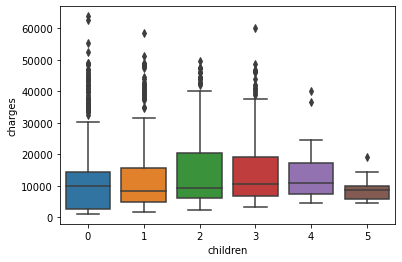

In [6]:
sns.boxplot(x = ohdat['children'],
            y = ohdat['charges'])

In [9]:
one_hot_children = pd.get_dummies(ohdat.children, prefix='children')
one_hot_children['children_3+'] = one_hot_children['children_3'] + one_hot_children['children_4'] + one_hot_children['children_5']

In [8]:
one_hot_children.sum(axis=0) 

children_0     574
children_1     324
children_2     240
children_3     157
children_4      25
children_5      18
children_3+    200
dtype: int64

4 and 5 children have low counts, reworking to having bins of 0, 1, 2, and 3+ children

In [10]:
model3dat = pd.concat([ohdat.iloc[:,:4], one_hot_children.iloc[:,[0,1,2,6]], ohdat.iloc[:,5:]],axis = 1)
model3dat.head()

,age,female,male,bmi,children_0,children_1,children_2,children_3+,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,1,0,0,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,0,1,0,0,0,0,0,1,0,1725.55230
2,28,0,1,33.000,0,0,0,1,0,0,0,1,0,4449.46200
3,33,0,1,22.705,1,0,0,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,1,0,0,0,0,0,1,0,0,3866.85520


## Takeaways:

Overall this model performs slighly worse than the previous models.  I believe it may be due to overfitting and low counts of 4 or 5 child patients

# LOOP TIME: here is where we calculate all our different models

The cell below works like this.  We now have 3 datasets: origional, just age, bmi, smoker, and origional + children are selected.  From there, we will perform linear and exponential regression on each dataset, and record the results in a dataframe



linear analysis for: origional_all

     r squared (ceof of det) is 0.772
     mean squared error: 34326663.795
     mean absolute error: 4164.542
     median absolute error: 2508.552
     resudial standard deviation: 5847.804
     residual absolute % difference mean: 43.9 %
     residual absolute % difference median: 27.9 %

     coeficients:
          intercept -11633.484
           age 248.083
           female 53.743
           male -53.743
           bmi 316.502
           children 608.44
           smoker 23919.536
           region_northeast 465.133
           region_northwest 26.921
           region_southeast -37.759
           region_southwest -454.294


exponential analysis for: origional_all

     r squared (ceof of det) is 0.804
     mean squared error: 80373222.324
     mean absolute error: 4563.517
     median absolute error: 1040.237
     resudial standard deviation: 8959.112
     residual absolute % difference mean: 28.7 %
     residual absolute % difference median: 

,name,type,r^2,MSE,MeanAE,MedAE,resid sd,resid abs % diff mean,resid abs % diff med,coefs
0,origional_all,linear,0.772,3.432666e+07,4164.542,2508.552,5847.804,43.9,27.9,"[(age, 248.083), (female, 53.743), (male, -53...."
0,origional_all,log,0.804,8.037322e+07,4563.517,1040.237,8959.112,28.7,14.8,"[(age, 0.034), (female, 0.03), (male, -0.03), ..."
0,reduced,linear,0.773,3.413772e+07,4152.197,2479.378,5831.107,45.1,28.9,"[(age, 250.303), (bmi, 313.081), (smoker, 2390..."
0,reduced,log,0.782,7.368361e+07,4422.342,1217.613,8581.003,31.1,16.1,"[(age, 0.035), (bmi, 0.011), (smoker, 1.546)]"
0,child_onehot,linear,0.773,3.413054e+07,4169.587,2512.221,5830.149,44.2,28.1,"[(age, 247.309), (female, 47.142), (male, -47...."
0,child_onehot,log,0.808,7.689130e+07,4514.568,1081.501,8764.752,28.8,16.4,"[(age, 0.034), (female, 0.029), (male, -0.029)..."


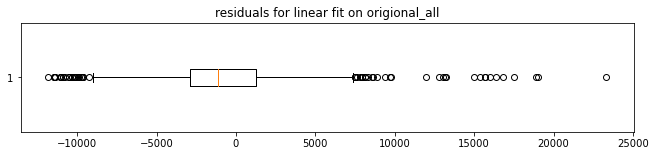

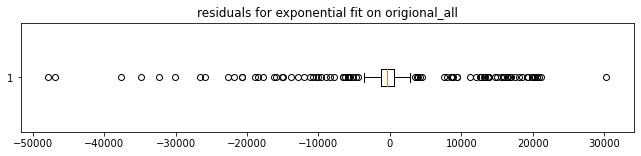

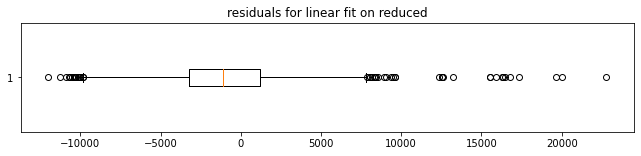

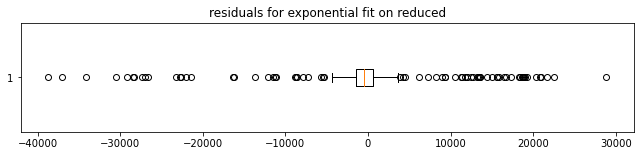

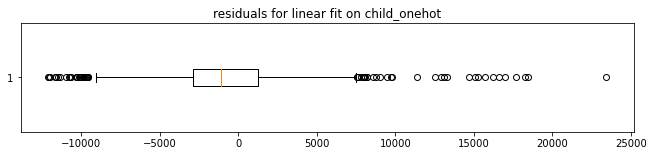

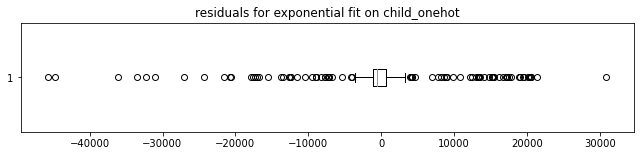

In [42]:
lin_orig = pd.DataFrame(linear_model_prediciton(ohdat, 'origional_all'))
exp_orig = pd.DataFrame(exp_model_prediciton(ohdat, 'origional_all'))
lin_red = pd.DataFrame(linear_model_prediciton(model2dat, 'reduced'))
exp_red = pd.DataFrame(exp_model_prediciton(model2dat, 'reduced'))
lin_child = pd.DataFrame(linear_model_prediciton(model3dat, 'child_onehot'))
exp_child = pd.DataFrame(exp_model_prediciton(model3dat, 'child_onehot'))

df = pd.concat([lin_orig,exp_orig,lin_red,exp_red,lin_child,exp_child])
df.head(6)

## Future plans:

* nonlinear regression (perform operations on the cost data, i.e. log or nth root to transform linear regression into nonlinear regression)
* outlier removal.  Train a model on non outlier data and see how it performs with outliers in the testing data.

# Outlier Removal

Here, we will try fitting a model to data that has had outliers removed.  From there, we will report the accuracy on that data that has outliers and data that has outliers removed and report the results

In [11]:
def model_prediciton_already_split(data, x_train, x_test, y_train, y_test):
    
    reg = LinearRegression().fit(x_train, y_train)

    y_pred = reg.predict(x_test)
    residuals = y_test - y_pred
    plt.boxplot(residuals, vert = False)
    plt.title('residuals boxplot')

    r_squared = reg.score(x_test, y_test)

    print('r sqared (ceof of det) is', round(r_squared,3))
    print('mean squared error:', round(mean_squared_error(y_test, y_pred), 3))
    print('mean absolute error:', round(np.mean(np.abs(residuals)),3))
    print('median absolute error:', round(np.median(np.abs(residuals)),3))
    print('resudial standard deviation:', round(np.std(residuals),3))
    print('residual absolute % difference mean:', round(100 * np.mean(np.abs(residuals/y_test)),1), '%')
    print('residual absolute % difference median:', round(100 * np.median(np.abs(residuals/y_test)),1), '%')
    print('')
    print('ceoficients:')
    print('intercept', round(reg.intercept_,3))
    for i in range(len(data.columns)-1):
        print(list(data.columns)[i], round(reg.coef_[i],3))

Let's take a look at our data

Text(0.5, 0, 'charges')

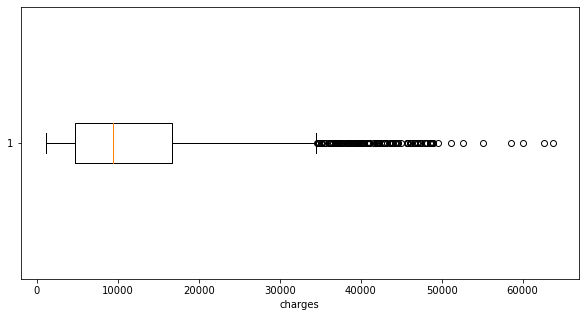

In [12]:
plt.figure(figsize = (10,5))
plt.boxplot(ohdat['charges'], vert = False)
plt.xlabel('charges')

In [13]:
ohdat.describe()['charges']

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

We can see here that charges mean is much higher than the median, implying significant skew.

In [14]:
q1 = 4740.287150
q3 = 16639.912515
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q3 - 1.5 * iqr

lower_bounded_data = ohdat[ohdat['charges'] >= lower_bound]
outlier_rm_data = lower_bounded_data[lower_bounded_data['charges']<=upper_bound]
print(ohdat.shape)
print(outlier_rm_data.shape)

(1338, 11)
(1199, 11)


training and testing on outlier removed data:
r sqared (ceof of det) is 0.512
mean squared error: 27265685.256
mean absolute error: 2805.491
median absolute error: 1394.87
resudial standard deviation: 5200.789
residual absolute % difference mean: 33.2 %
residual absolute % difference median: 23.8 %

ceoficients:
intercept -3391.396
age 238.601
female 25.609
male -25.609
bmi 58.46
children 405.406
smoker 14768.939
region_northeast 669.977
region_northwest 277.002
region_southeast -445.283
region_southwest -501.695


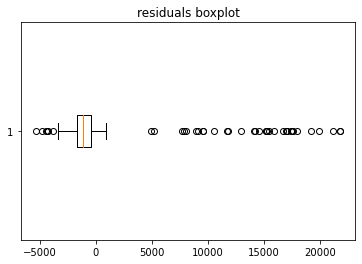

In [15]:
x_train, x_test, y_train, y_test = train_test_split(ohdat.iloc[:,:-1], ohdat.iloc[:,-1], 
                                                    test_size = 0.25, random_state = 10)
x_train_orm, x_test_orm, y_train_orm, y_test_orm = train_test_split(outlier_rm_data.iloc[:,:-1], 
                                                                    outlier_rm_data.iloc[:,-1], 
                                                                    test_size = 0.25, random_state = 10)
print('training and testing on outlier removed data:')
model_prediciton_already_split(outlier_rm_data, x_train_orm, x_test_orm, y_train_orm, y_test_orm)

training on outleir removed, testing on outliers not removed
r sqared (ceof of det) is 0.612
mean squared error: 52227872.691
mean absolute error: 3909.607
median absolute error: 1528.141
resudial standard deviation: 7006.634
residual absolute % difference mean: 31.1 %
residual absolute % difference median: 26.0 %

ceoficients:
intercept -3391.396
age 238.601
female 25.609
male -25.609
bmi 58.46
children 405.406
smoker 14768.939
region_northeast 669.977
region_northwest 277.002
region_southeast -445.283
region_southwest -501.695


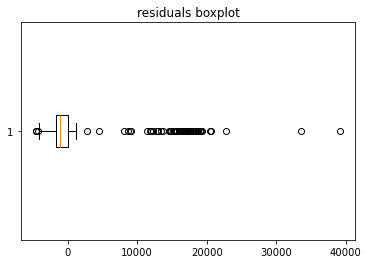

In [16]:
print('training on outleir removed, testing on outliers not removed')
model_prediciton_already_split(ohdat, x_train_orm, x_test, y_train_orm, y_test)

Overall, both of these performed poorly, so we'll leave the more extreme values in.  I believe that this is ude to the more extreme values being correlated with smoker, so removing them removes that correlation to smoker.

Overall, it looks like removing outliers from training data made r squared and mse worse, but it made median absolute error and residual absolute % difference mean and median better.

# ---------------------------------------------------------------------------------------------------------------

# Part two: nonlinear models.

I had some extra free time, so I decided to play around with sklearn Support Vector Regression (SVR)

In [36]:
def test_SVR(data, data_name, kernel_type, c, seeds, degree=2):
    scaler = StandardScaler()
    scaler.fit(data)
    ret_dict = {}
    ret_dict['data'] = [data_name]
    ret_dict['type'] = [kernel_type]
    ret_dict['C'] = [c]
    if kernel_type == 'poly':
        ret_dict['degree'] = [degree]
    else:
        ret_dict['degree'] = [-1]
    
    ret_dict['r^2'] = []
    ret_dict['train_mse'] =[]
    ret_dict['test_mse'] = []
    ret_dict['medA%d'] = []
    
    for seed in seeds:
        x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], 
                                                            test_size = 0.25, random_state = seed)
        svr = make_pipeline(StandardScaler(), SVR(kernel = kernel_type, C = c, max_iter = 10000000)) 


        svr.fit(x_train, y_train)
        train_pred = svr.predict(x_train)
        test_pred = svr.predict(x_test)
        residuals = y_test - test_pred

        train_mse = mean_squared_error(y_train, train_pred)
        ret_dict['train_mse'].append(train_mse)
        test_mse = mean_squared_error(y_test, test_pred)
        ret_dict['test_mse'].append(test_mse)
        r_sq = svr.score(x_test, y_test)
        ret_dict['r^2'].append(r_sq)
        med_resid_perc = round(100 * np.median(np.abs(residuals/y_test)),1)
        ret_dict['medA%d'].append(med_resid_perc)

    ret_dict['r^2'] = np.mean(ret_dict['r^2'])   
    ret_dict['train_mse'] = np.mean(ret_dict['train_mse'])
    ret_dict['test_mse'] = np.mean(ret_dict['test_mse'])
    ret_dict['medA%d'] = np.mean(ret_dict['medA%d'])
    return ret_dict

In [12]:
c_vals = [1000, 5000, 6000]
kernel_types = ['linear','poly','rbf']
degrees = [2,3,4,5]
data = [ohdat, model2dat, model3dat]
seeds = [5,10,15,20,25]
data_names = ['origional', 'reduced', 'child_onehot']
list_of_dictionaries = []

In [37]:
for d in range(len(data)):
    for c in c_vals:
        for kernel_type in kernel_types:
            if kernel_type == 'poly':
                for degree in degrees:
                    list_of_dictionaries.append(test_SVR(data[d], 
                                                         data_names[d],kernel_type, c, seeds,degree))
            list_of_dictionaries.append(test_SVR(data[d], data_names[d],kernel_type, c, seeds))

In [38]:
svm_stats = pd.DataFrame(list_of_dictionaries)

svm_stats.head(147)

,data,type,C,degree,r^2,train_mse,test_mse,medA%d
0,[origional],[linear],[1000],[-1],0.659651,4.871633e+07,4.870801e+07,8.84
1,[origional],[poly],[1000],[2],0.762223,3.838674e+07,3.401767e+07,9.58
2,[origional],[poly],[1000],[3],0.762223,3.838674e+07,3.401767e+07,9.58
3,[origional],[poly],[1000],[4],0.762223,3.838674e+07,3.401767e+07,9.58
4,[origional],[poly],[1000],[5],0.762223,3.838674e+07,3.401767e+07,9.58
5,[origional],[poly],[1000],[2],0.762223,3.838674e+07,3.401767e+07,9.58
6,[origional],[rbf],[1000],[-1],0.706050,4.822249e+07,4.213153e+07,4.58
7,[origional],[linear],[5000],[-1],0.657588,4.895471e+07,4.900832e+07,8.64
8,[origional],[poly],[5000],[2],0.845986,2.626482e+07,2.200443e+07,3.98
9,[origional],[poly],[5000],[3],0.845986,2.626482e+07,2.200443e+07,3.98


###  Best performing model was on reduced data, rbf or polynomial with a large c value (1000)

[reduced]	[rbf]	[1000]	[-1]	2.623070e+07	2.494229e+07	0.814506

In [18]:
def test_SVR_plot(data, data_name,kernel_type, c):    
    scaler = StandardScaler()
    scaler.fit(data)
    
    x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], 
                                                        test_size = 0.25, random_state = 10)
    svr = make_pipeline(StandardScaler(), SVR(kernel = kernel_type, C = c, max_iter = 1000000)) 

    svr.fit(x_train, y_train)
    train_pred = svr.predict(x_train)
    test_pred = svr.predict(x_test)
    resid = test_pred - y_test
    
    bins = np.arange(0,60001,2000)
    plt.figure(figsize=(10,7))
    plt.hist(y_test, color = 'red', label = 'actual', alpha = 0.2, bins = bins)
    plt.hist(test_pred, color = 'blue', label = 'predicted', alpha = 0.2, bins= bins)
    plt.title('predictions vs actual')
    plt.legend()
    
    plt.figure()
    plt.hist(resid)
    plt.title('residuals')
    
    plt.figure(figsize = (10, 3))
    plt.boxplot(resid, vert = False)
    
    plt.figure()
    plt.hist(np.abs(resid/y_test))
    plt.title('abs % error')
    plt.figure(figsize = (10, 3))
    plt.boxplot(100 * np.abs(resid/y_test), vert = False)
    
    
    train_mse = mean_squared_error(y_train, train_pred)

    test_mse = mean_squared_error(y_test, test_pred)

    r_sq = svr.score(x_test, y_test)
    print(r_sq)
    print(test_mse)
    
    print('residual absolute % difference mean:', round(100 * np.mean(np.abs(resid/y_test)),1), '%')
    print('residual absolute % difference median:', round(100 * np.median(np.abs(resid/y_test)),1), '%')

0.8082056082121329
25789472.07114208
residual absolute % difference mean: 9.8 %
residual absolute % difference median: 0.8 %


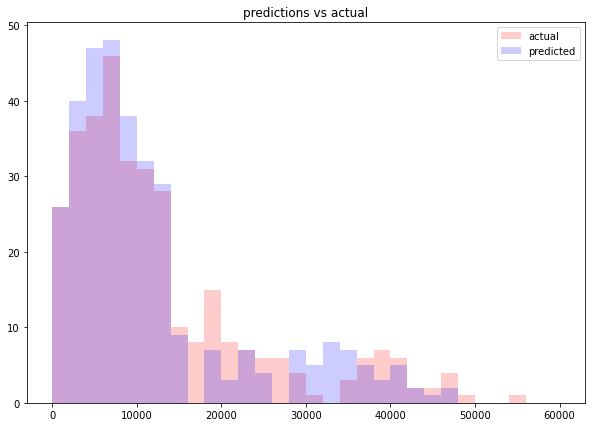

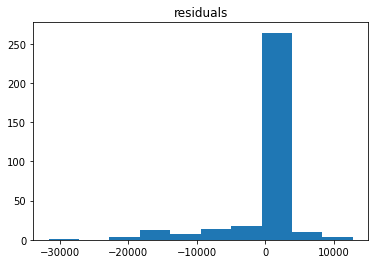

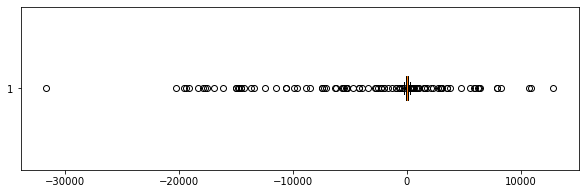

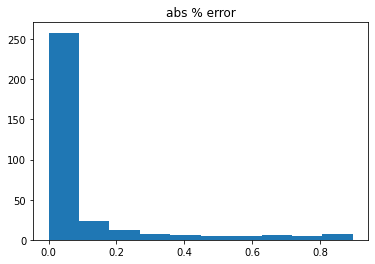

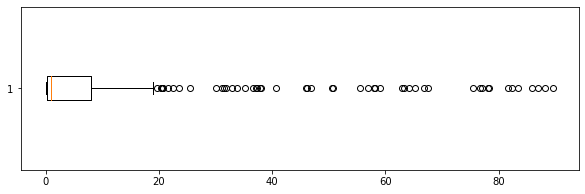

In [19]:
test_SVR_plot(data[0], data_names[0],'rbf', 6000)